In [10]:
# Data manipulation
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Train/test split
from sklearn.model_selection import train_test_split

# Tools for preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics and plots
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay
)

# Make plots easier to read in Colab
plt.rcParams["figure.figsize"] = (8, 5)


In [11]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()



(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Missing values per column:

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


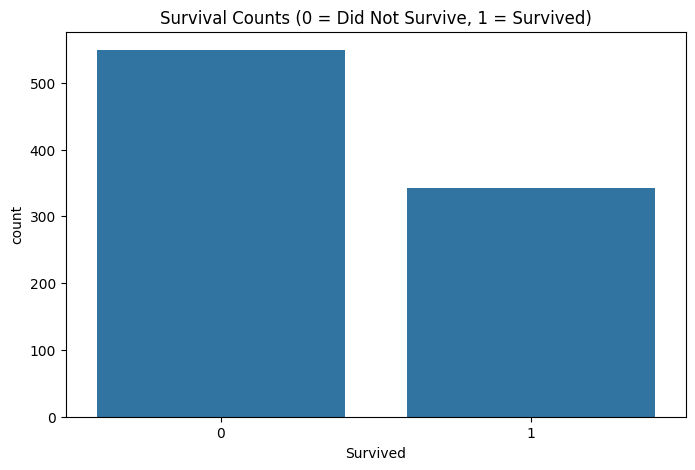

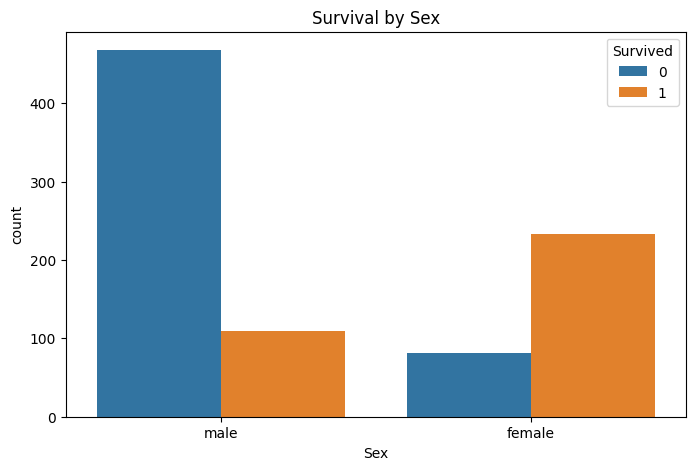

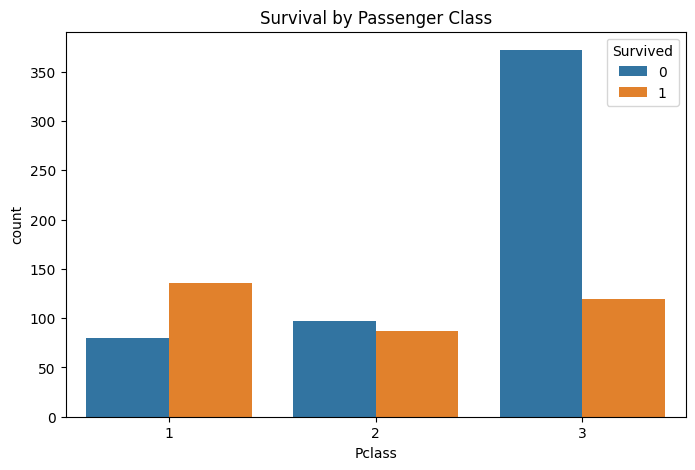

In [12]:
# Check how many missing values exist in each column
# This informs how we handle preprocessing later
print("Missing values per column:\n")
print(df.isna().sum().sort_values(ascending=False))

# Plot overall survival counts
sns.countplot(x="Survived", data=df)
plt.title("Survival Counts (0 = Did Not Survive, 1 = Survived)")
plt.show()

# Plot survival outcomes by sex
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

# Plot survival outcomes by passenger class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


In [13]:
# Define the input features used for prediction
# These are interpretable and commonly used in Titanic models
features = ["Pclass", "Sex", "Age", "Fare", "Embarked"]

# X contains the predictor variables
X = df[features]

# y contains the target variable (0 = no, 1 = yes)
y = df["Survived"]

# Verify feature names and preview data
print("Selected features:", features)
X.head()


Selected features: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']


,Pclass,Sex,Age,Fare,Embarked
0,3,male,22.0,7.2500,S
1,1,female,38.0,71.2833,C
2,3,female,26.0,7.9250,S
3,1,female,35.0,53.1000,S
4,3,male,35.0,8.0500,S


In [14]:
# Split the data into training (80%) and testing (20%) sets
# Stratify ensures the survival ratio is similar in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Print the size of each split
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (712, 5)
Test set size: (179, 5)


In [15]:
# Identify numeric and categorical columns
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Embarked", "Pclass"]

# Numeric preprocessing:
# - Replace missing values with the median
# - Scale values to have similar ranges
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Categorical preprocessing:
# - Replace missing values with the most frequent category
# - Convert categories into numeric dummy variables
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# Combine numeric and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


In [16]:
# Logistic Regression serves as a simple, interpretable baseline model
log_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Fit the model using the training data
log_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [17]:
# Random Forest is an ensemble model that captures non-linear relationships
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=300,  # number of trees in the forest
        random_state=42
    ))
])

# Fit the random forest model
rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked',
                                                   'Pclass'])])),
                ('model',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [18]:
# Generate predictions on the test set
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Calculate and print accuracy for each model
print("Logistic Regression Accuracy:",
      round(accuracy_score(y_test, log_preds), 4))

print("Random Forest Accuracy:",
      round(accuracy_score(y_test, rf_preds), 4))

# Print detailed classification metrics for the Random Forest model
print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, rf_preds))


Logistic Regression Accuracy: 0.7765
Random Forest Accuracy: 0.8212

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



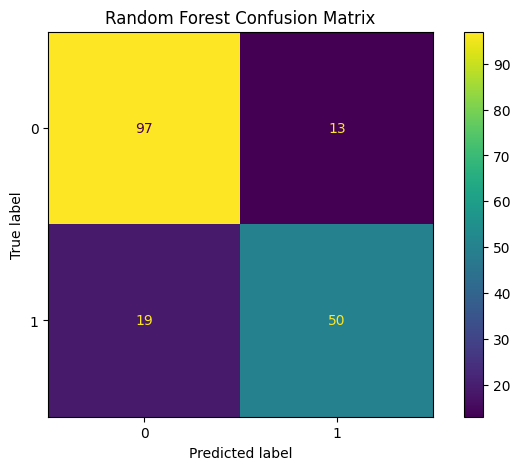

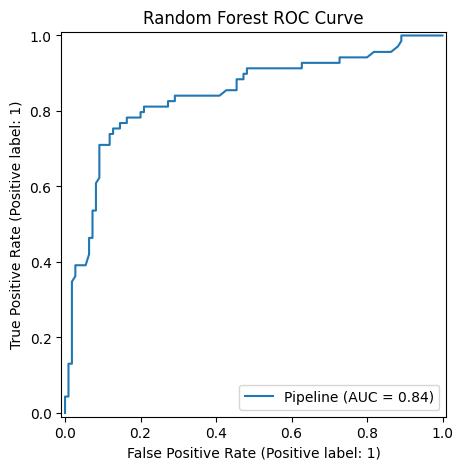

In [19]:
# Confusion matrix shows true/false positives and negatives
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC curve shows model performance across classification thresholds
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()


In [20]:
# Create a DataFrame representing a "Jack-like" passenger
# Assumptions based on the movie:
# - Male
# - Approximately 20 years old
# - Third-class passenger
# - Low fare
# - Embarked from Southampton (S)
jack = pd.DataFrame([{
    "Pclass": 3,
    "Sex": "male",
    "Age": 20,
    "Fare": 7.25,
    "Embarked": "S"
}])

# Predict survival probability for Jack using both models
jack_log_prob = log_model.predict_proba(jack)[0][1]
jack_rf_prob = rf_model.predict_proba(jack)[0][1]

print("Jack-like passenger profile:\n", jack)
print("\nPredicted probability of survival:")
print("Logistic Regression:", round(jack_log_prob, 3))
print("Random Forest:", round(jack_rf_prob, 3))


Jack-like passenger profile:
    Pclass   Sex  Age  Fare Embarked
0       3  male   20  7.25        S

Predicted probability of survival:
Logistic Regression: 0.102
Random Forest: 0.029


In [21]:
# Create multiple hypothetical scenarios for Jack
# This helps illustrate how class and gender affect survival
scenarios = pd.DataFrame([
    {"Scenario": "Jack (3rd class, male)", "Pclass": 3, "Sex": "male",   "Age": 20, "Fare": 7.25, "Embarked": "S"},
    {"Scenario": "Jack if 1st class",      "Pclass": 1, "Sex": "male",   "Age": 20, "Fare": 80.0, "Embarked": "S"},
    {"Scenario": "Jack if female",         "Pclass": 3, "Sex": "female", "Age": 20, "Fare": 7.25, "Embarked": "S"},
    {"Scenario": "Jack older (35)",        "Pclass": 3, "Sex": "male",   "Age": 35, "Fare": 7.25, "Embarked": "S"}
])

# Compute survival probabilities for each scenario
scenarios["P_survive_LogReg"] = scenarios.apply(
    lambda r: log_model.predict_proba(
        pd.DataFrame([r[["Pclass","Sex","Age","Fare","Embarked"]]])
    )[0][1],
    axis=1
)

scenarios["P_survive_RF"] = scenarios.apply(
    lambda r: rf_model.predict_proba(
        pd.DataFrame([r[["Pclass","Sex","Age","Fare","Embarked"]]])
    )[0][1],
    axis=1
)

# Display results sorted by Random Forest probability
scenarios[["Scenario", "P_survive_LogReg", "P_survive_RF"]].sort_values(
    "P_survive_RF", ascending=False
)


,Scenario,P_survive_LogReg,P_survive_RF
2,Jack if female,0.565653,0.863333
1,Jack if 1st class,0.500951,0.156667
0,"Jack (3rd class, male)",0.102228,0.029444
3,Jack older (35),0.066048,0.003333
